In [1]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import plot_model
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from sklearn.model_selection import train_test_split

In [3]:
# Define the data directories and image dimensions
img_width = 1280
img_height = 720
batch_size = 5

In [4]:
# Set the path to your data directory
data_dir = "C:/Users/DELL/Desktop/datatest/D-E"

# Get the list of all folders names
image_files = os.listdir(data_dir)
print("All folders names:", image_files)

All folders names: ['fail', 'pass', 'test', 'train']


In [5]:
# Get the list of all pass image file names
pass_dir = os.path.join(data_dir, "pass")
pass_images = [os.path.join(pass_dir, file) for file in os.listdir(pass_dir)]

# Print the lists of pass and fail image file names
print("Pass images:", pass_images)

Pass images: ['C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729125601_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729125729_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729130429_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729132658_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729134822_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220729135350_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220802103153_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220804022405_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220804023155_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220806145639_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220806150932_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220806152519_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220806153433_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\pass\\20220807132349_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-

In [6]:
# Get the list of all fail image file names
fail_dir = os.path.join(data_dir, "fail")
fail_images = [os.path.join(fail_dir, file) for file in os.listdir(fail_dir)]

# Print the lists of pass and fail image file names
print("Fail images:", fail_images)

Fail images: ['C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729111810_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729125808_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729130447_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729130716_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729131136_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729131248_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729131458_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729133003_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729134805_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220729135334_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220802103136_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220803103812_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220803104053_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-E\\fail\\20220804022024_EV4.JPG', 'C:/Users/DELL/Desktop/datatest/D-

In [7]:
# Split the data into train and test sets (70% train, 30% test)
pass_train, pass_test = train_test_split(pass_images, test_size=0.3, random_state=42)
fail_train, fail_test = train_test_split(fail_images, test_size=0.3, random_state=42)

# Create the train and test directories
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
os.makedirs(os.path.join(train_dir, "pass"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "fail"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "pass"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "fail"), exist_ok=True)

# Copy the pass images to the train and test directories
for file in pass_train:
    dest_file = os.path.join(train_dir, "pass", os.path.basename(file))
    if not os.path.exists(dest_file):
        shutil.copy(file, dest_file)
for file in pass_test:
    dest_file = os.path.join(test_dir, "pass", os.path.basename(file))
    if not os.path.exists(dest_file):
        shutil.copy(file, dest_file)

# Copy the fail images to the train and test directories
for file in fail_train:
    dest_file = os.path.join(train_dir, "fail", os.path.basename(file))
    if not os.path.exists(dest_file):
        shutil.copy(file, dest_file)
for file in fail_test:
    dest_file = os.path.join(test_dir, "fail", os.path.basename(file))
    if not os.path.exists(dest_file):
        shutil.copy(file, dest_file)

In [8]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Add Dropout layer after last Convolutional layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print the model summary
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Define the data generators for image augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load the training and testing data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary"
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary"
)

Found 42 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [13]:
# Train the model
history = model.fit(train_data, epochs=10, validation_data=test_data,callbacks=[early_stop])

Epoch 1/10
9/9 [==============================] - 1161s 137s/step - loss: 3.7788 - accuracy: 0.5238 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 1034s 115s/step - loss: 0.7244 - accuracy: 0.4762 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 1085s 118s/step - loss: 0.7053 - accuracy: 0.4762 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 4/10
9/9 [==============================] - 1095s 121s/step - loss: 0.6922 - accuracy: 0.6190 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
9/9 [==============================] - 1127s 125s/step - loss: 0.6931 - accuracy: 0.5714 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
9/9 [==============================] - 1126s 124s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000


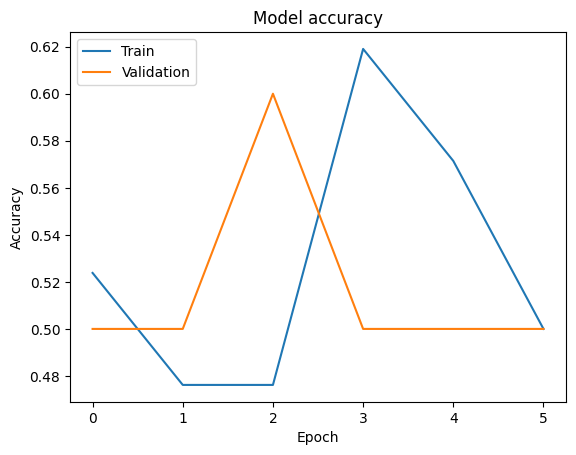

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

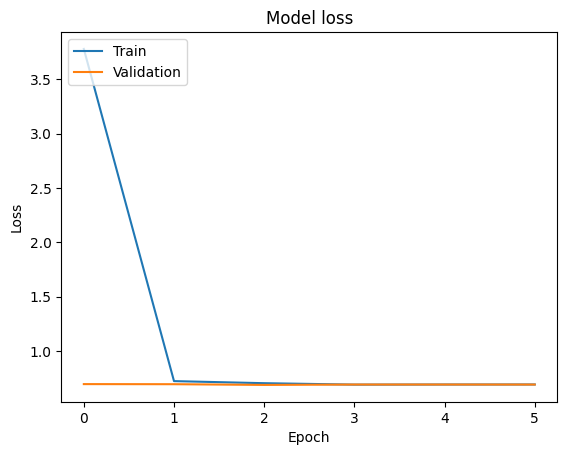

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save the trained model
model.save('my_model.h5')